[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhujisheng/learn_python/blob/master/08.科学计算与作图/6.Seaborn作图（1）.ipynb)

[《Python应用实战》视频课程](https://study.163.com/course/courseMain.htm?courseId=1209533804&share=2&shareId=400000000624093)

# 音乐(1)

难度：★★★★☆

## 环境准备

#### [LibROSA库](https://librosa.github.io/librosa/index.html)

LibROSA是一个音乐与音频处理的python库。

`pip install librosa`

#### Jupyter Notebook

- 本机运行

  Python编程环境之《[浏览器中的Python——Jupyter](../00.Python编程环境/4.浏览器中的Python——Jupyter.md)》

- 云端运行

  科学计算与作图之《[基础环境准备](../08.科学计算与作图/1.基础环境准备.ipynb)》

#### 下载一些音乐样例

In [ ]:
!mkdir audio

In [20]:
import os, urllib
filename = 'audio/example1.wav'
url = "https://github.com/zhujisheng/learn_python/raw/master/09.%E5%A3%B0%E9%9F%B3%E5%A4%84%E7%90%86/programs/audio/example1.wav"
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename=filename)

In [ ]:
ls audio

## 基础使用

#### 生成单一频率的声音

In [50]:
import numpy

T = 2.0 # seconds
frequency = 440.0
sr1 = 22050
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x1 = numpy.sin(2*numpy.pi*frequency*t)

x1

array([ 0.        ,  0.12505052,  0.24813785, ..., -0.36732959,
       -0.24813785, -0.12505052])

#### 播放声音

In [51]:
import IPython.display as ipd

ipd.Audio(x1, rate=sr1)

#### 加载音乐文件

In [52]:
import librosa

x2, sr2 = librosa.load('audio/example1.wav')
ipd.Audio(x2, rate=sr2)

#### 声音波形图

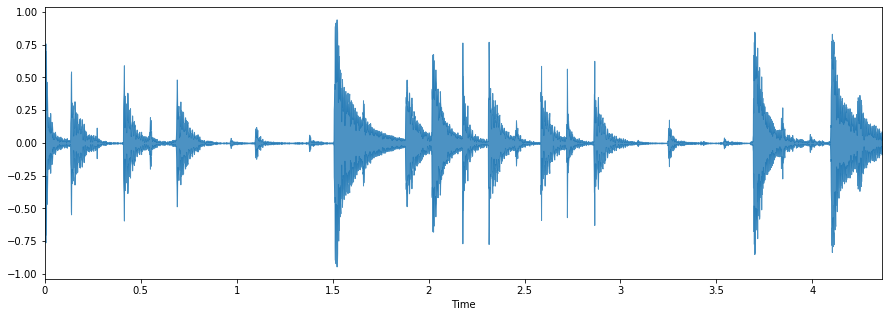

In [55]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(15, 5))
librosa.display.waveplot(x2, sr2, alpha=0.8)
plt.show()

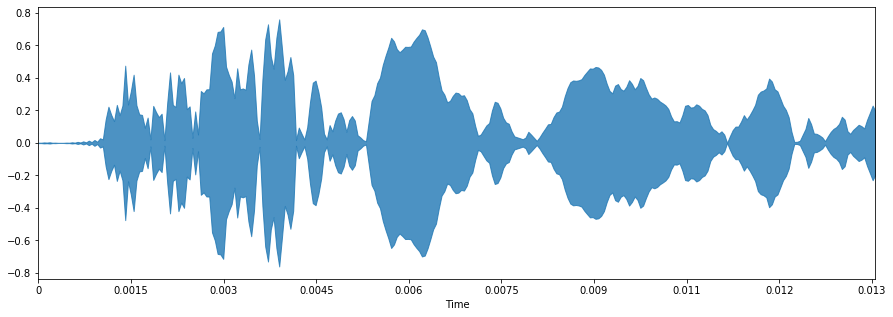

In [56]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x2[:300], sr2, alpha=0.8)
plt.show()

#### 声音频率

Text(0.5, 0, 'Frequency (Hz)')

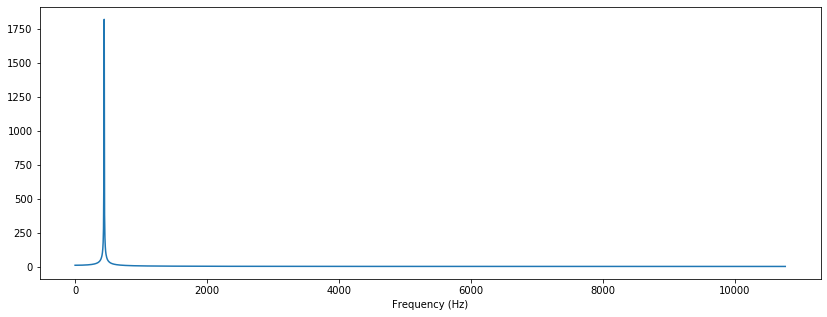

In [58]:
import scipy

X = scipy.fft(x1[:4096])
X_mag = numpy.absolute(X)        # spectral magnitude
f = numpy.linspace(0, sr1, 4096)  # frequency variable

plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

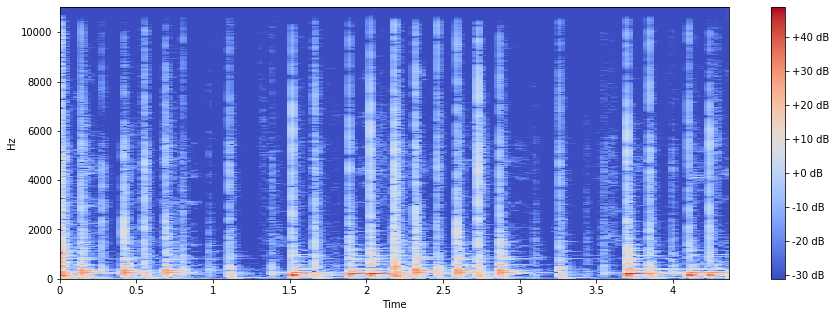

In [62]:
hop_length = 512
n_fft = 2048
X = librosa.stft(x2, n_fft=n_fft, hop_length=hop_length)

S = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr2, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [ ]:
librosa.output.write_wav('audio/tone_440.wav', x, sr)